# **part 1 clustering**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming data is loaded into a DataFrame named `df`
# Replace 'file_path' with the path to your dataset
df = pd.read_csv('dataset.csv')


# Check for missing values in the entire DataFrame
missing_data = df.isna().sum()

# Display the result
print(missing_data)


timestamp                             0
raw_acc:magnitude_stats:mean          0
raw_acc:magnitude_stats:std           0
raw_acc:magnitude_stats:moment3       0
raw_acc:magnitude_stats:moment4       0
                                   ... 
label:PHONE_IN_BAG                 3960
label:PHONE_ON_TABLE               3107
label:WITH_CO-WORKERS              3960
label:WITH_FRIENDS                   81
label_source                          0
Length: 278, dtype: int64


In [13]:
df.shape

(3960, 278)

In [16]:
# Fill missing values with the mean for numerical columns
df = df.fillna(df.mean())


In [17]:
missing_data = df.isna().sum()

# Display the result
print(missing_data)


timestamp                             0
raw_acc:magnitude_stats:mean          0
raw_acc:magnitude_stats:std           0
raw_acc:magnitude_stats:moment3       0
raw_acc:magnitude_stats:moment4       0
                                   ... 
label:PHONE_IN_BAG                 3960
label:PHONE_ON_TABLE                  0
label:WITH_CO-WORKERS              3960
label:WITH_FRIENDS                    0
label_source                          0
Length: 278, dtype: int64


In [18]:
df.shape

(3960, 278)

In [26]:
df.columns.tolist()

['timestamp',
 'raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:moment4',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_stats:value_entropy',
 'raw_acc:magnitude_stats:time_entropy',
 'raw_acc:magnitude_spectrum:log_energy_band0',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_spectrum:log_energy_band4',
 'raw_acc:magnitude_spectrum:spectral_entropy',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:std_x',
 'raw_acc:3d:std_y',
 'raw_acc:3d:std_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz',
 'proc_gyro:magnitude_stats:mean',
 'proc_gyro:magnitude_stats:std

In [19]:
c="location:log_latitude_range"

In [ ]:
if c in df.columns:
  print(c)

In [21]:
df['location:log_latitude_range']

0       0.040498
1       0.000079
2       0.051085
3       0.014225
4       0.016058
          ...   
3955    0.000462
3956    0.000457
3957    0.000463
3958    0.000457
3959    0.000462
Name: location:log_latitude_range, Length: 3960, dtype: float64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


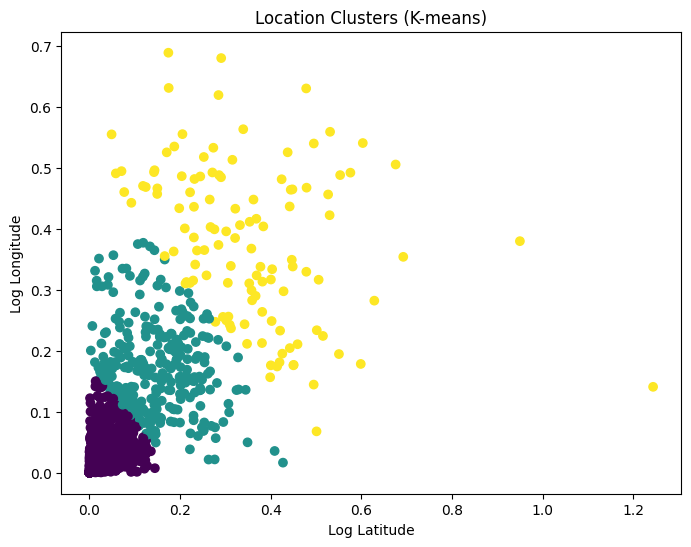

In [27]:

# Step 1: Extract Location Data
location_data = df[['location:log_latitude_range', 'location:log_longitude_range']]

# Step 2: Apply K-means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(location_data)

# Add the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(location_data['location:log_latitude_range'], location_data['location:log_longitude_range'], c=cluster_labels, cmap='viridis')
plt.xlabel('Log Latitude')
plt.ylabel('Log Longitude')
plt.title('Location Clusters (K-means)')
plt.show()


# **part 2 pie chart**

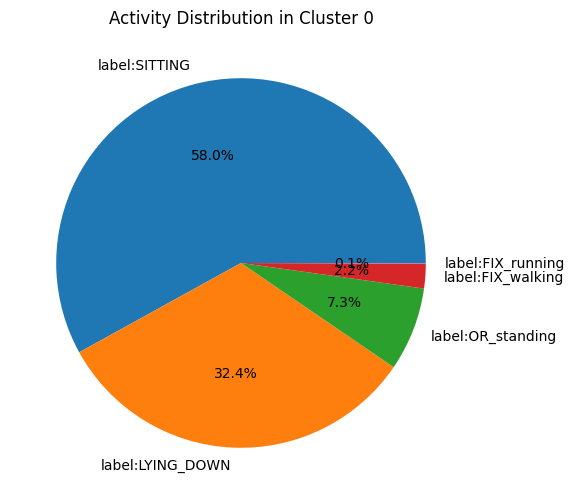

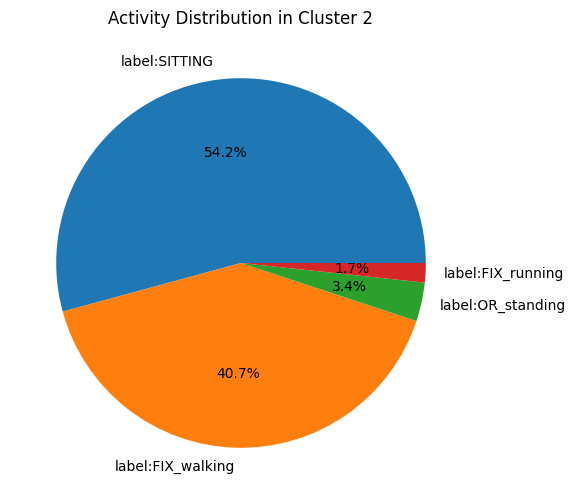

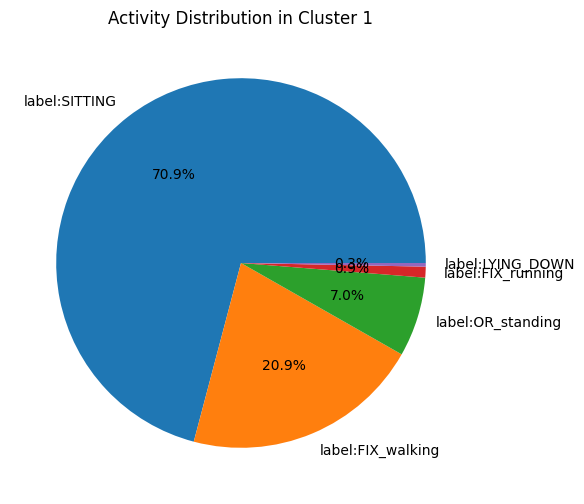

In [28]:

# Step 1: Identify Columns for Relevant Activities
relevant_activity_labels = [
    'label:LYING_DOWN',
    'label:SITTING',
    'label:FIX_walking',
    'label:FIX_running',
    'label:OR_standing'
]

# Step 2: Filter Data for Relevant Activities
filtered_df = df[df[relevant_activity_labels].any(axis=1)]

# Ensure 'Cluster' column exists
if 'Cluster' not in filtered_df.columns:
    raise Exception("Ensure the DataFrame has a 'Cluster' column.")

# Step 3: Calculate Activity Distribution for Each Cluster
# Loop through each unique cluster
for cluster in filtered_df['Cluster'].unique():
    # Filter data for this cluster
    cluster_data = filtered_df[filtered_df['Cluster'] == cluster]

    # Find the most common activity in this cluster
    activity_counts = cluster_data[relevant_activity_labels].apply(lambda x: x.idxmax(), axis=1)

    # Count the occurrences of each activity
    activity_distribution = activity_counts.value_counts(normalize=True)

    # Step 4: Create Pie Charts
    plt.figure(figsize=(6, 6))
    plt.pie(
        activity_distribution,
        labels=activity_distribution.index,
        autopct='%1.1f%%'
    )
    plt.title(f'Activity Distribution in Cluster {cluster}')
    plt.show()